# Q5: Open Question

## There are 8 models in this notebook. Model 5 is the best one.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from keras import layers
from keras import models
from keras import optimizers
from keras.applications import VGG16
from keras.regularizers import l1, l2, l1_l2

Using TensorFlow backend.


In [3]:
import json
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np

from keras.preprocessing.image import ImageDataGenerator

In [14]:
import pickle
import seaborn as sns
import pandas as pd
import glob
import matplotlib.image as mpimg

In [5]:
root = '/userhome/34/ljiang/deep_learning/A2/Datasets/cat_dog_car_bike/'
train_dir = os.path.join(root, 'train')
val_dir = os.path.join(root, 'val')
test_dir = os.path.join(root, 'test')

In [77]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.figure(1, figsize=(10, 10))
    plt.subplot(211)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(212)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [78]:
MAPPING = {
    0: 'cat',
    1: 'dog',
    2: 'car',
    3: 'motorbike'
}

def save_history(history, index=None):
    if index is None:
        index = len(glob.glob('/userhome/34/ljiang/deep_learning/A2/ass2/history/*.p'))
    with open('/userhome/34/ljiang/deep_learning/A2/ass2/history/history-%d.p' % index, 'wb') as f:
        pickle.dump(history, f)

def plot_pickle(index):
    path = '/userhome/34/ljiang/deep_learning/A2/ass2/history/history-%d.p' % index
    with open(path, 'rb') as f:
        history = pickle.load(f)
        plot_history(history)
        
def plot_error(model, data_generator):
    y_predict = model.predict_generator(data_generator)
    for i in np.nonzero([np.argmax(y) for y in y_predict] != data_generator.classes)[0]:
        file_name = data_generator.filenames[i]
        file_path = os.path.join(data_generator.directory, file_name)
        plt.imshow(mpimg.imread(file_path))
        plt.title('%s: %s\n(%s)' % (file_name, MAPPING[np.argmax(y_predict[i])], list(y_predict[i])))
        plt.show()
        
def load_model(file_name, root='/userhome/34/ljiang/deep_learning/A2/ass2/'):
    return models.load_model(os.path.join(root, file_name))

## Model 1

In [164]:
aug_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
aug_train_generator = aug_train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical')
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False)

def best_model():
    conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    set_trainable = False
    for layer in conv_base.layers:
        if layer.name == 'block5_conv1':
            set_trainable = True
        layer.trainable = set_trainable
    
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
    return model

model_q5 = best_model()
history_q5 = model_q5.fit_generator(
    aug_train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_generator,
    validation_steps=50)

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Epoch 1/30
100/100 [==============================] - 139s 1s/step - loss: 0.4330 - acc: 0.8475 - val_loss: 0.0171 - val_acc: 0.9735
Epoch 2/30
100/100 [==============================] - 135s 1s/step - loss: 0.1244 - acc: 0.9560 - val_loss: 0.0930 - val_acc: 0.9790
Epoch 3/30
100/100 [==============================] - 135s 1s/step - loss: 0.0876 - acc: 0.9688 - val_loss: 0.0471 - val_acc: 0.9612
Epoch 4/30
100/100 [==============================] - 128s 1s/step - loss: 0.0704 - acc: 0.9738 - val_loss: 0.1188 - val_acc: 0.9790
Epoch 5/30
100/100 [==============================] - 130s 1s/step - loss: 0.0588 - acc: 0.9795 - val_loss: 0.0894 - val_acc: 0.9788
Epoch 6/30
100/100 [==============================] - 131s 1s/step - loss: 0.0714 - acc: 0.9795 - val_loss: 0.0024 - val_acc: 0.9821
Epoch 7/30
100/100 [==============================] - 125s 1s/step - loss: 0.0

In [165]:
# model_q5.save('/userhome/34/ljiang/deep_learning/A2/ass2/q5_model_1')

In [169]:
model_q5.summary()

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_61 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_131 (Dense)            (None, 512)               12845568  
_________________________________________________________________
dense_132 (Dense)            (None, 4)                 2052      
Total params: 27,562,308
Trainable params: 19,927,044
Non-trainable params: 7,635,264
_________________________________________________________________


In [166]:
model_q5.evaluate_generator(test_generator)

[0.0, 0.9649999737739563]

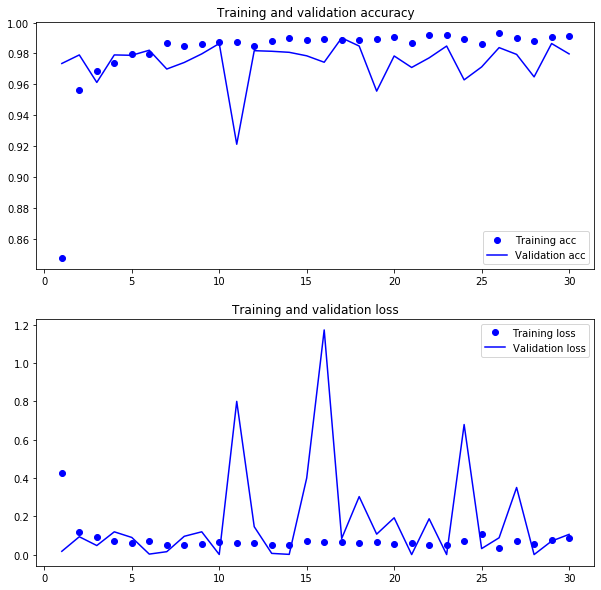

In [168]:
plot_history(hs[0]['history'])

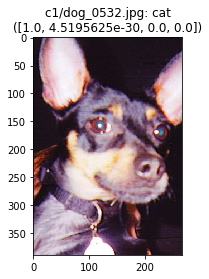

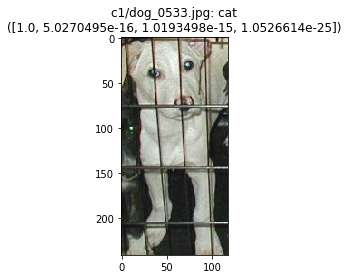

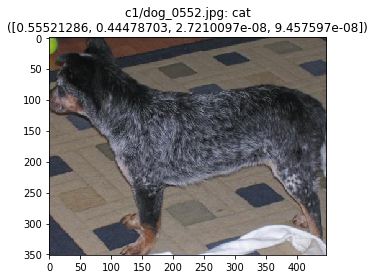

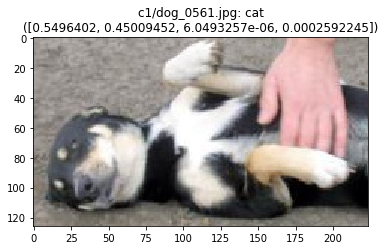

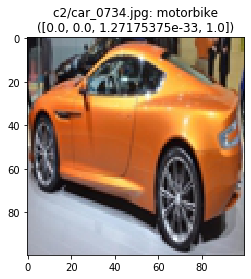

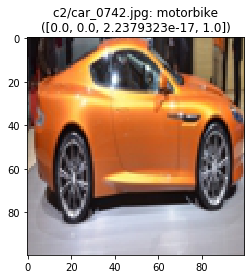

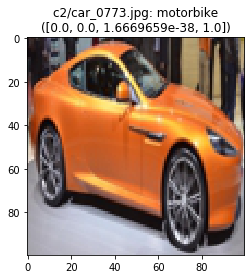

In [71]:
model = load_model('q5_model_1')
plot_error(model, test_generator)

## Model 2：降低batch size

In [172]:
aug_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
aug_train_generator = aug_train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False)

def best_model():
    conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    set_trainable = False
    for layer in conv_base.layers:
        if layer.name == 'block5_conv1':
            set_trainable = True
        layer.trainable = set_trainable
    
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
    return model

model_q5 = best_model()
history_q5 = model_q5.fit_generator(
    aug_train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_generator,
    validation_steps=50)

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Epoch 1/30
100/100 [==============================] - 107s 1s/step - loss: 0.4985 - acc: 0.8008 - val_loss: 0.0934 - val_acc: 0.8931
Epoch 2/30
100/100 [==============================] - 74s 741ms/step - loss: 0.1621 - acc: 0.9386 - val_loss: 0.0935 - val_acc: 0.9767
Epoch 3/30
100/100 [==============================] - 68s 681ms/step - loss: 0.1607 - acc: 0.9487 - val_loss: 0.1362 - val_acc: 0.9708
Epoch 4/30
100/100 [==============================] - 68s 683ms/step - loss: 0.1031 - acc: 0.9645 - val_loss: 0.0083 - val_acc: 0.9741
Epoch 5/30
100/100 [==============================] - 69s 690ms/step - loss: 0.1065 - acc: 0.9670 - val_loss: 0.0063 - val_acc: 0.9838
Epoch 6/30
100/100 [==============================] - 68s 675ms/step - loss: 0.1058 - acc: 0.9664 - val_loss: 0.5148 - val_acc: 0.9293
Epoch 7/30
100/100 [==============================] - 68s 677ms/step

In [174]:
# model_q5.save('/userhome/34/ljiang/deep_learning/A2/ass2/q5_model_2')

In [176]:
model_q5.summary()

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_62 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_133 (Dense)            (None, 512)               12845568  
_________________________________________________________________
dense_134 (Dense)            (None, 4)                 2052      
Total params: 27,562,308
Trainable params: 19,927,044
Non-trainable params: 7,635,264
_________________________________________________________________


In [173]:
model_q5.evaluate_generator(test_generator)

[0.0, 0.9700000286102295]

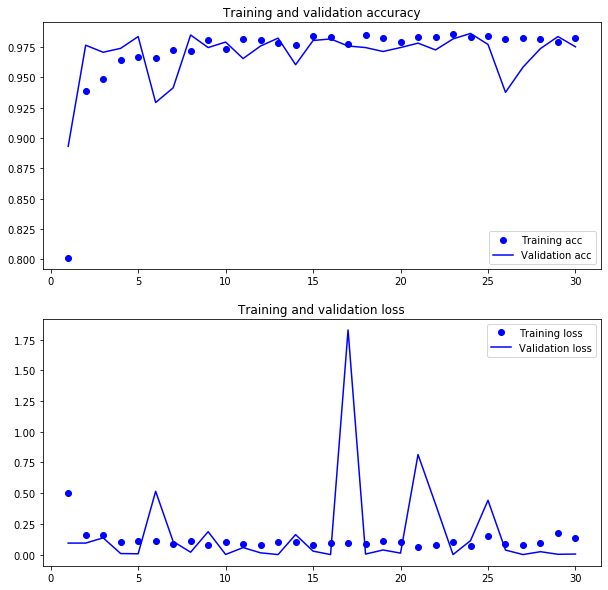

In [175]:
plot_history(hs[1]['history'])

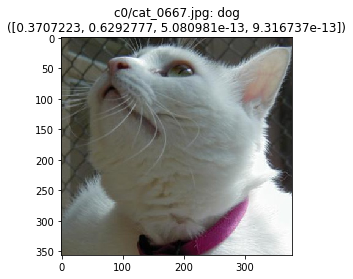

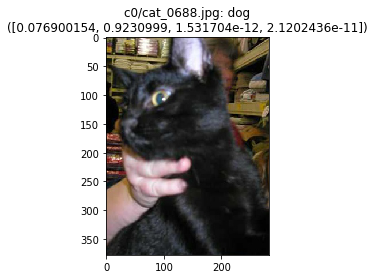

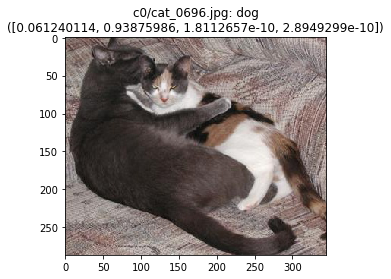

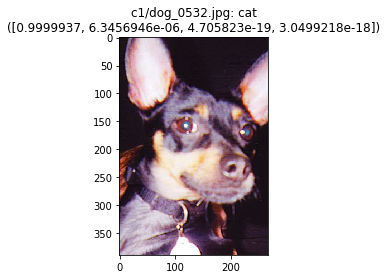

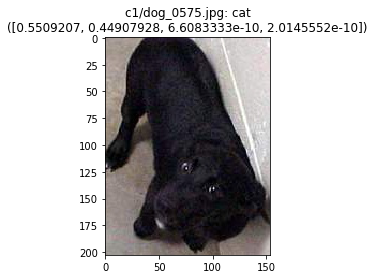

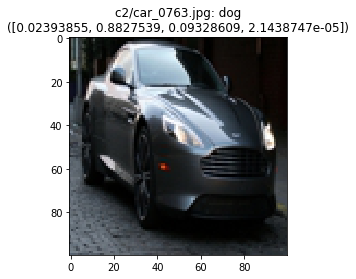

In [69]:
model = load_model('q5_model_2')
plot_error(model, test_generator)

## Model 3：不要dropout

In [177]:
aug_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
aug_train_generator = aug_train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False)

def best_model():
    conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    set_trainable = False
    for layer in conv_base.layers:
        if layer.name == 'block5_conv1':
            set_trainable = True
        layer.trainable = set_trainable
    
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
    return model

model_q5 = best_model()
history_q5 = model_q5.fit_generator(
    aug_train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_generator,
    validation_steps=50)
hs.append({
    'model': model_q5,
    'history': history_q5,
})

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Epoch 1/30
100/100 [==============================] - 76s 759ms/step - loss: 0.4565 - acc: 0.8238 - val_loss: 0.2007 - val_acc: 0.9325
Epoch 2/30
100/100 [==============================] - 68s 675ms/step - loss: 0.1521 - acc: 0.9433 - val_loss: 0.0121 - val_acc: 0.9747
Epoch 3/30
100/100 [==============================] - 65s 652ms/step - loss: 0.1033 - acc: 0.9648 - val_loss: 0.0091 - val_acc: 0.9715
Epoch 4/30
100/100 [==============================] - 65s 646ms/step - loss: 0.1012 - acc: 0.9704 - val_loss: 0.0357 - val_acc: 0.9825
Epoch 5/30
100/100 [==============================] - 66s 658ms/step - loss: 0.0947 - acc: 0.9718 - val_loss: 0.0516 - val_acc: 0.9734
Epoch 6/30
100/100 [==============================] - 65s 655ms/step - loss: 0.0769 - acc: 0.9777 - val_loss: 0.1949 - val_acc: 0.9715
Epoch 7/30
100/100 [==============================] - 66s 661ms/st

In [178]:
# model_q5.save('/userhome/34/ljiang/deep_learning/A2/ass2/q5_model_3')

In [179]:
model_q5.summary()

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_63 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_135 (Dense)            (None, 512)               12845568  
_________________________________________________________________
dense_136 (Dense)            (None, 4)                 2052      
Total params: 27,562,308
Trainable params: 19,927,044
Non-trainable params: 7,635,264
_________________________________________________________________


In [180]:
model_q5.evaluate_generator(test_generator)

[0.0, 0.9549999833106995]

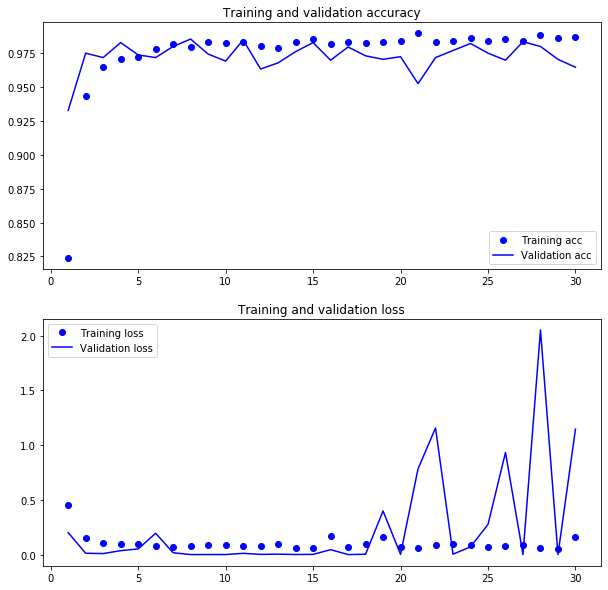

In [181]:
plot_history(history_q5)

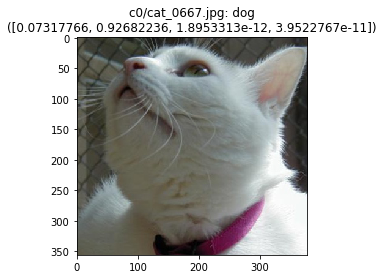

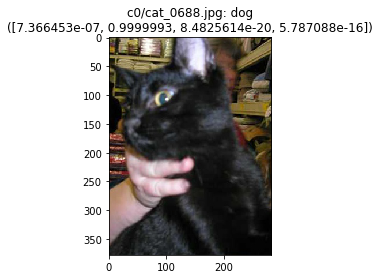

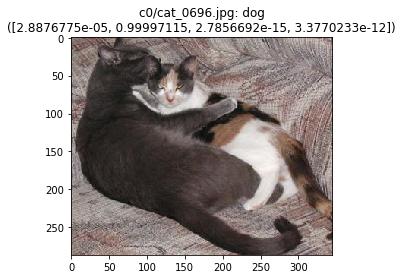

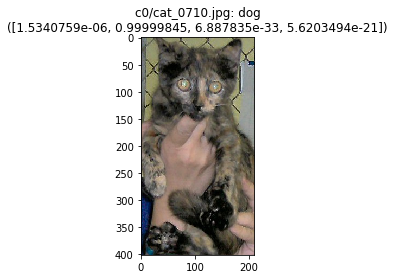

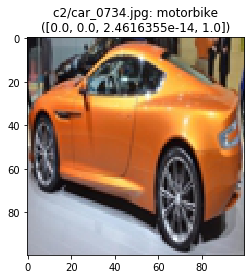

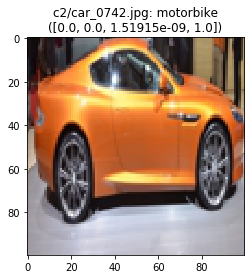

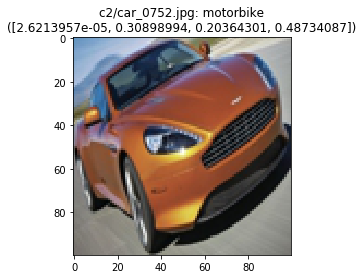

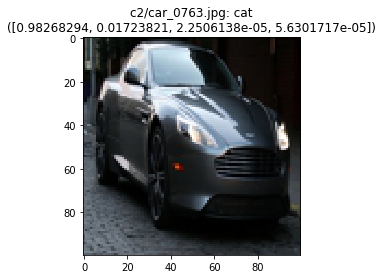

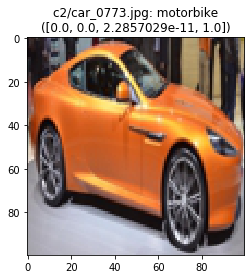

In [70]:
model = load_model('q5_model_3')
plot_error(model, test_generator)

## Model 4: dropout在relu之后
（block4_conv1 开始多训练几层 效果很差！！！）

In [84]:
aug_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
aug_train_generator = aug_train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical')
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=1,
    class_mode='categorical',
    shuffle=False)

def best_model():
    conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    set_trainable = False
    for layer in conv_base.layers:
        if layer.name == 'block5_conv1':
            set_trainable = True
        layer.trainable = set_trainable
    
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
    return model

model_q5 = best_model()
history_q5 = model_q5.fit_generator(
    aug_train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_generator,
    validation_steps=50)

model_q5.save('/userhome/34/ljiang/deep_learning/A2/ass2/q5_model_4')
save_history(history_q5, 4)

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Epoch 1/30
100/100 [==============================] - 90s 899ms/step - loss: 0.4938 - acc: 0.8030 - val_loss: 0.0588 - val_acc: 0.9714
Epoch 2/30
100/100 [==============================] - 84s 837ms/step - loss: 0.1684 - acc: 0.9414 - val_loss: 0.1493 - val_acc: 0.9637
Epoch 3/30
100/100 [==============================] - 83s 827ms/step - loss: 0.1308 - acc: 0.9572 - val_loss: 0.0455 - val_acc: 0.9663
Epoch 4/30
100/100 [==============================] - 85s 851ms/step - loss: 0.1470 - acc: 0.9544 - val_loss: 0.0110 - val_acc: 0.9734
Epoch 5/30
100/100 [==============================] - 82s 823ms/step - loss: 0.1020 - acc: 0.9683 - val_loss: 0.0222 - val_acc: 0.9844
Epoch 6/30
100/100 [==============================] - 85s 851ms/step - loss: 0.1195 - acc: 0.9709 - val_loss: 0.0208 - val_acc: 0.9754
Epoch 7/30
100/100 [==============================] - 87s 865ms/st

In [88]:
model_q5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 2052      
Total params: 31,494,468
Trainable params: 23,859,204
Non-trainable params: 7,635,264
_________________________________________________________________


In [89]:
model_q5.evaluate_generator(test_generator)

[0.0, 0.9549999833106995]

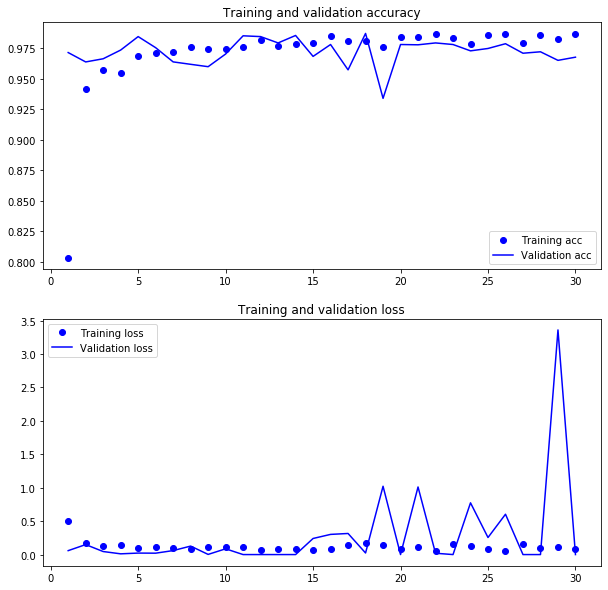

In [90]:
plot_history(history_q5)

## Model 5: 加batch_normalization layer， dropout  (Best)

In [91]:
aug_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
aug_train_generator = aug_train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False)

def best_model():
    conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    set_trainable = False
    for layer in conv_base.layers:
        if layer.name == 'block5_conv1':
            set_trainable = True
        layer.trainable = set_trainable
    
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
    return model

model_q5 = best_model()
history_q5 = model_q5.fit_generator(
    aug_train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_generator,
    validation_steps=50)

model_q5.save('/userhome/34/ljiang/deep_learning/A2/ass2/q5_model_5')
save_history(history_q5, 5)

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Epoch 1/30
100/100 [==============================] - 83s 831ms/step - loss: 0.2918 - acc: 0.8762 - val_loss: 0.0633 - val_acc: 0.9726
Epoch 2/30
100/100 [==============================] - 70s 699ms/step - loss: 0.1180 - acc: 0.9592 - val_loss: 0.4167 - val_acc: 0.9436
Epoch 3/30
100/100 [==============================] - 73s 729ms/step - loss: 0.0951 - acc: 0.9690 - val_loss: 0.0538 - val_acc: 0.9540
Epoch 4/30
100/100 [==============================] - 69s 690ms/step - loss: 0.0723 - acc: 0.9755 - val_loss: 0.0708 - val_acc: 0.9818
Epoch 5/30
100/100 [==============================] - 70s 704ms/step - loss: 0.0763 - acc: 0.9709 - val_loss: 8.4715e-04 - val_acc: 0.9754
Epoch 6/30
100/100 [==============================] - 67s 675ms/step - loss: 0.0572 - acc: 0.9788 - val_loss: 0.4300 - val_acc: 0.9721
Epoch 7/30
100/100 [==============================] - 69s 686m

In [95]:
model_q5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 2052      
Total params: 27,564,356
Trainable params: 19,928,068
Non-trainable params: 7,636,288
__________________________________

In [96]:
model_q5.evaluate_generator(test_generator)

[1.1920928244535389e-07, 0.9950000047683716]

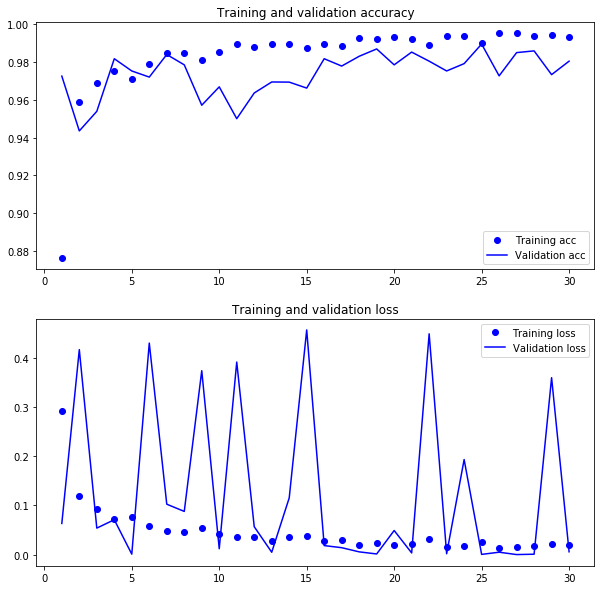

In [97]:
plot_history(history_q5)

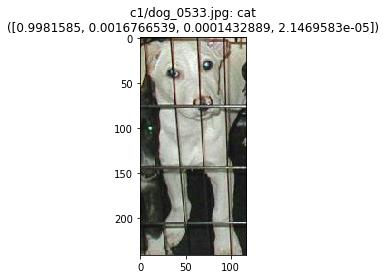

In [144]:
plot_error(load_model('q5_model_5'), test_generator)

## Model 6: 加batch_normalization layer，不要dropout

In [142]:
aug_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
aug_train_generator = aug_train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False)

def best_model():
    conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    set_trainable = False
    for layer in conv_base.layers:
        if layer.name == 'block5_conv1':
            set_trainable = True
        layer.trainable = set_trainable
    
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
#     model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
    return model

model_q5 = best_model()
history_q5 = model_q5.fit_generator(
    aug_train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_generator,
    validation_steps=50)

model_q5.save('/userhome/34/ljiang/deep_learning/A2/ass2/q5_model_6')
save_history(history_q5, 6)

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [109]:
model_q5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               12845568  
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 2052      
Total params: 27,564,356
Trainable params: 19,928,068
Non-trainable params: 7,636,288
_________________________________________________________________


In [110]:
model_q5.evaluate_generator(test_generator)

[0.0, 0.9750000238418579]

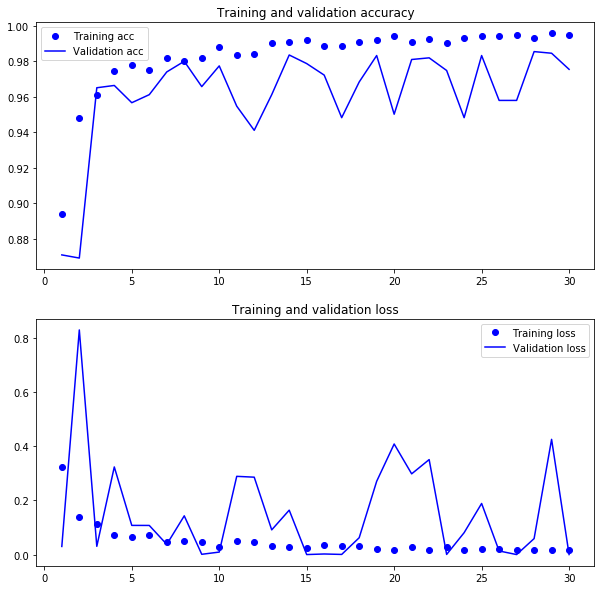

In [111]:
plot_history(history_q5)

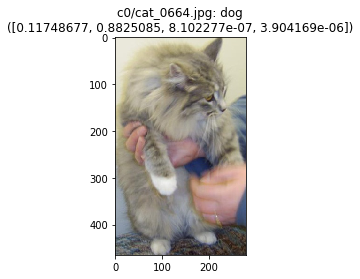

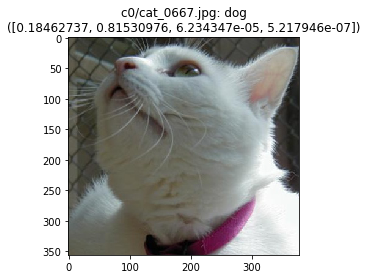

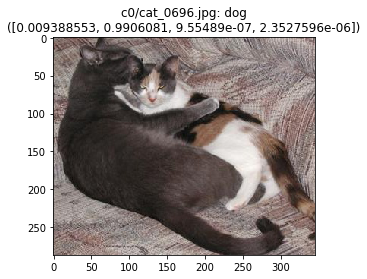

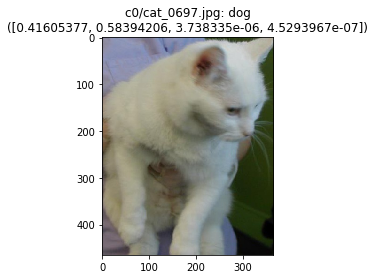

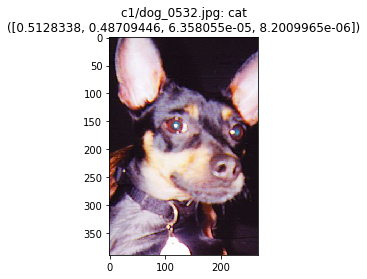

In [143]:
model = load_model('q5_model_6')
plot_error(model, test_generator)

## Model 7: model 5 + vertical flip + 20 epoch

In [145]:
aug_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')
aug_train_generator = aug_train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False)

def best_model():
    conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    set_trainable = False
    for layer in conv_base.layers:
        if layer.name == 'block5_conv1':
            set_trainable = True
        layer.trainable = set_trainable
    
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
    return model

model_q5 = best_model()
history_q5 = model_q5.fit_generator(
    aug_train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=val_generator,
    validation_steps=50)

model_q5.save('/userhome/34/ljiang/deep_learning/A2/ass2/q5_model_7')
save_history(history_q5, 7)

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Epoch 1/20
100/100 [==============================] - 77s 769ms/step - loss: 0.3517 - acc: 0.8515 - val_loss: 0.0409 - val_acc: 0.9497
Epoch 2/20
100/100 [==============================] - 73s 727ms/step - loss: 0.1975 - acc: 0.9269 - val_loss: 0.3927 - val_acc: 0.9332
Epoch 3/20
100/100 [==============================] - 70s 701ms/step - loss: 0.1410 - acc: 0.9440 - val_loss: 0.0445 - val_acc: 0.9559
Epoch 4/20
100/100 [==============================] - 71s 712ms/step - loss: 0.1252 - acc: 0.9509 - val_loss: 1.0473 - val_acc: 0.8106
Epoch 5/20
100/100 [==============================] - 73s 728ms/step - loss: 0.1071 - acc: 0.9591 - val_loss: 0.0011 - val_acc: 0.9728
Epoch 6/20
100/100 [==============================] - 72s 721ms/step - loss: 0.1007 - acc: 0.9633 - val_loss: 0.2011 - val_acc: 0.9734
Epoch 7/20
100/100 [==============================] - 70s 701ms/st

In [150]:
model_q5.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_11 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               12845568  
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 2052      
Total params: 27,564,356
Trainable params: 19,928,068
Non-trainable params: 7,636,288
_________________________________

In [151]:
model_q5.evaluate_generator(test_generator)

[0.0, 0.9800000190734863]

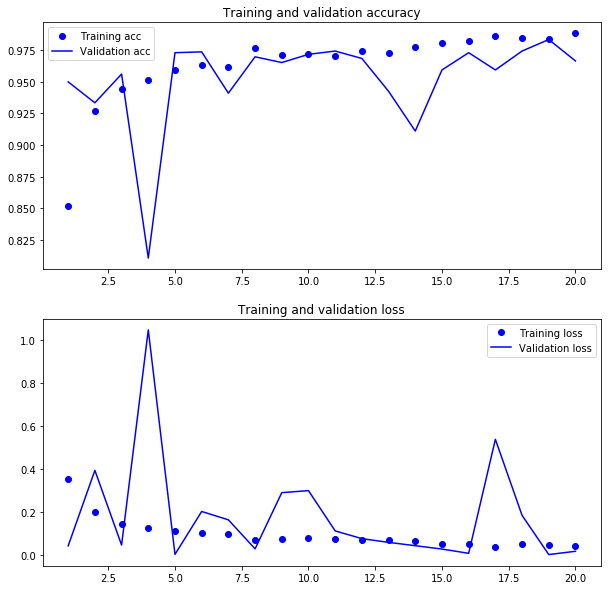

In [152]:
plot_history(history_q5)

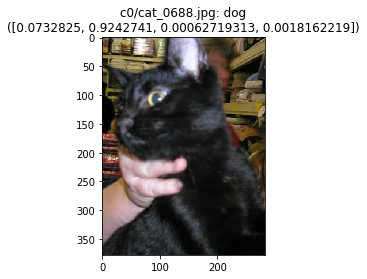

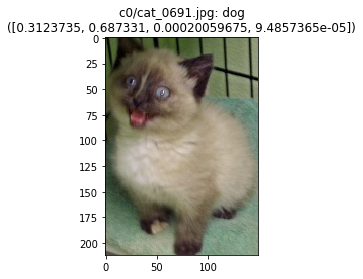

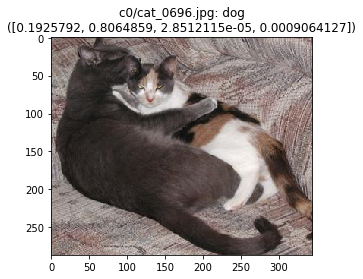

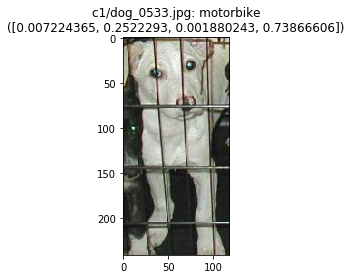

In [153]:
# model = load_model('q5_model_3')
plot_error(model_q5, test_generator)

## Model 8: model 5 + vertical flip + 20 epoch + 256

In [165]:
aug_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
aug_train_generator = aug_train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical')
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=1,
    class_mode='categorical',
    shuffle=False)

def best_model():
    conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    set_trainable = False
    for layer in conv_base.layers:
        if layer.name == 'block5_conv1':
            set_trainable = True
        layer.trainable = set_trainable
    
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
    return model

model_q5 = best_model()
history_q5 = model_q5.fit_generator(
    aug_train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=val_generator,
    validation_steps=50)

model_q5.save('/userhome/34/ljiang/deep_learning/A2/ass2/q5_model_8')
save_history(history_q5, 8)

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Epoch 1/20
100/100 [==============================] - 91s 908ms/step - loss: 0.2859 - acc: 0.8854 - val_loss: 0.6128 - val_acc: 0.9300
Epoch 2/20
100/100 [==============================] - 86s 864ms/step - loss: 0.1152 - acc: 0.9557 - val_loss: 0.0513 - val_acc: 0.9760
Epoch 3/20
100/100 [==============================] - 87s 873ms/step - loss: 0.0931 - acc: 0.9649 - val_loss: 0.0411 - val_acc: 0.9708
Epoch 4/20
100/100 [==============================] - 84s 843ms/step - loss: 0.0771 - acc: 0.9706 - val_loss: 0.0020 - val_acc: 0.9682
Epoch 5/20
100/100 [==============================] - 91s 908ms/step - loss: 0.0706 - acc: 0.9744 - val_loss: 0.0852 - val_acc: 0.9630
Epoch 6/20
100/100 [==============================] - 81s 808ms/step - loss: 0.0570 - acc: 0.9805 - val_loss: 2.7515e-04 - val_acc: 0.9818
Epoch 7/20
100/100 [==============================] - 89s 890m

In [166]:
model_q5.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_15 (Flatten)         (None, 32768)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               16777728  
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 2052      
Total params: 31,496,516
Trainable params: 23,860,228
Non-trainable params: 7,636,288
_________________________________

In [167]:
model_q5.evaluate_generator(test_generator)

[0.0002489972102921456, 0.9549999833106995]

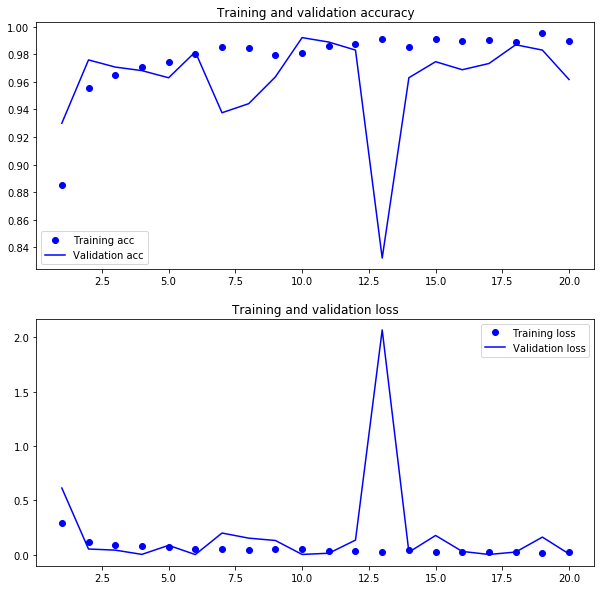

In [168]:
plot_history(history_q5)

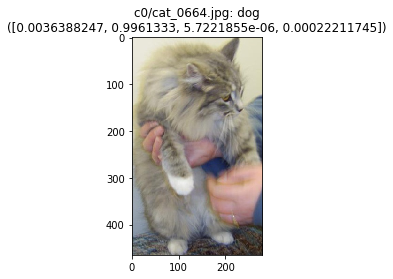

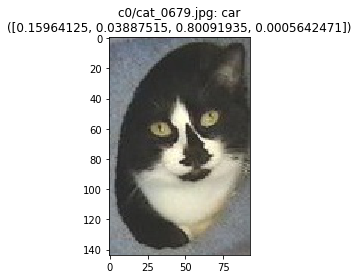

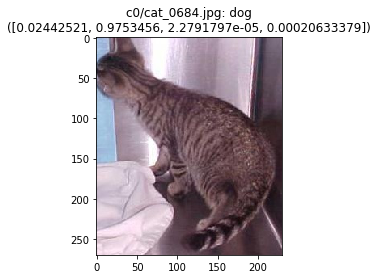

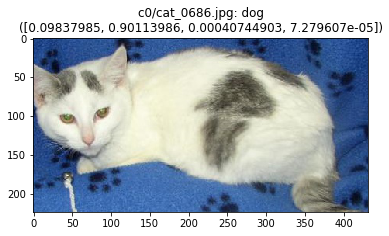

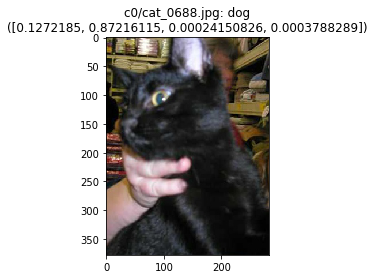

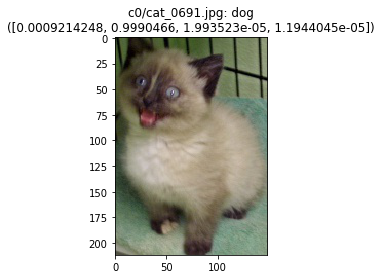

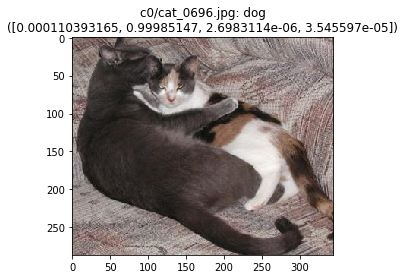

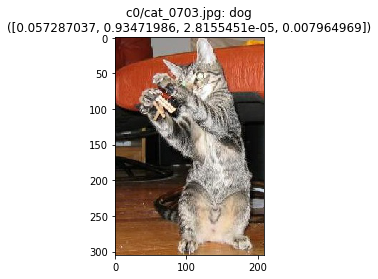

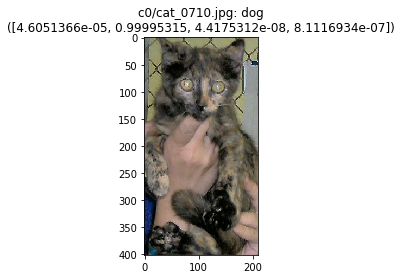

In [169]:
# model = load_model('q5_model_3')
plot_error(model_q5, test_generator)